## **Proyecto 1 - Parte 3 - Selección del modelo**

Stefanie M. Alvarez Pérez, 20002045

In [410]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso  #Regresión de lasso (Penaliza betas, más grande beta, mejor el modelo)
from sklearn.feature_selection import SelectFromModel

### 3. Selección de Variables

In [411]:
X_train = pd.read_csv("prep_Xtrain.csv") #Importar la data ya pre-procesada
X_test = pd.read_csv("prep_Xtest.csv")

In [412]:
X_train.head()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0.0,0.0,0.119403,0.636364,0.052632,1.0,0.036364,0.000000,0.0,0.00,...,0.0,0.000000,0.272727,0.0,0.0,0.0,0.666667,0.000,0.2,0.5
1,1.0,0.0,0.017639,0.090909,0.000000,1.0,0.036364,0.333333,0.0,0.25,...,0.0,0.111111,0.272727,0.0,0.0,0.0,0.666667,0.000,0.4,0.5
2,1.0,0.0,0.000000,0.272727,0.000000,1.0,0.018182,0.000000,0.0,0.00,...,1.0,0.000000,0.272727,0.0,0.0,0.0,0.666667,0.125,0.4,0.5
3,0.0,0.0,0.000000,0.636364,0.000000,1.0,0.036364,0.000000,0.0,0.00,...,0.0,0.000000,0.000000,1.0,0.0,0.0,0.666667,0.000,0.2,0.5
4,0.0,0.0,0.031208,0.363636,0.000000,1.0,0.036364,0.000000,0.0,0.00,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.666667,0.000,0.0,0.5


In [413]:
#np.unique(X_test['hotel'])
#np.unique(X_test['is_canceled'])
#np.unique(X_test['lead_time'])
#np.unique(X_test['arrival_date_month'])
#np.unique(X_test['stays_in_weekend_nights'])
#np.unique(X_test['stays_in_week_nights'])
#np.unique(X_test['adults'])
#np.unique(X_test['children'])
#np.unique(X_test['babies'])
#np.unique(X_test['meal'])
#np.unique(X_test['market_segment'])
#np.unique(X_test['distribution_channel'])
#np.unique(X_test['is_repeated_guest'])
#np.unique(X_test['previous_cancellations'])
#np.unique(X_test['previous_bookings_not_canceled'])
#np.unique(X_test['reserved_room_type'])
#np.unique(X_test['assigned_room_type'])
#np.unique(X_test['booking_changes'])
#np.unique(X_test['deposit_type'])
#np.unique(X_test['days_in_waiting_list'])
#np.unique(X_test['customer_type'])
#np.unique(X_test['required_car_parking_spaces'])
#np.unique(X_test['total_of_special_requests'])
#np.unique(X_test['reservation_status'])

In [414]:
np.unique(y_train['adr'])

array([  0.  ,   0.26,   0.5 , ..., 109.96, 109.98, 110.  ])

In [415]:
X_test.dtypes

hotel                             float64
is_canceled                       float64
lead_time                         float64
arrival_date_month                float64
stays_in_weekend_nights           float64
stays_in_week_nights              float64
adults                            float64
children                          float64
babies                            float64
meal                              float64
market_segment                    float64
distribution_channel              float64
is_repeated_guest                 float64
previous_cancellations            float64
previous_bookings_not_canceled    float64
reserved_room_type                float64
assigned_room_type                float64
booking_changes                   float64
deposit_type                      float64
days_in_waiting_list              float64
customer_type                     float64
required_car_parking_spaces       float64
total_of_special_requests         float64
reservation_status                

In [416]:
y_train = pd.read_csv("prep_ytrain.csv")
y_test = pd.read_csv("prep_ytest.csv")

y_test.head()

,adr
0,111.35
1,108.00
2,80.00
3,30.00
4,145.00


Quitar los valores negativos en y_train

In [417]:
np.unique(y_train)

array([-6.38e+00,  0.00e+00,  2.60e-01, ...,  5.08e+02,  5.10e+02,
        5.40e+03])

In [418]:
y_train = np.maximum(y_train, 0.0)
y_test = np.maximum(y_test, 0.0)

In [419]:
y_train = np.minimum(y_train, 110)
y_test = np.minimum(y_test, 110)

In [420]:
np.amin(y_train)

adr    0.0
dtype: float64

In [421]:
np.amax(y_train)

adr    110.0
dtype: float64

In [422]:
#objeto selector de variables
#Con Lasso introducimos alpha para penalizarlo a cuanto debería valer Beta

sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [423]:
sel_.get_support().sum() #Vector que devuelve cuántas variables quedan al final

24

In [424]:
sel_.get_support() #Con cuáles sí me quedé, después de la penalización

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [425]:
selected_features = X_train.columns[(sel_.get_support())]

In [426]:
selected_features #Obtener los nombres de las variables que sí tenemos que usar

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status'],
      dtype='object')

In [427]:
#Generar un CSV con las variables a usar
pd.Series(selected_features).to_csv('selected_features.csv', index=False)

### 4. Entrenamiento del Modelo

In [428]:
#Seleccionar solo las variables filtradas anteriormente
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [429]:
#AQUI VA EL MODELO
linear_model = Lasso(alpha=0.001, random_state=2022)

linear_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=2022)

#### Predicciones

In [430]:
from sklearn.metrics import mean_squared_error, r2_score

In [431]:
preds_train = linear_model.predict(X_train)

In [432]:
X_train = X_train.drop(['stays_in_weekend_nights'], axis=1)

In [433]:
#Resultados del Train
print("MSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_train), np.exp(preds_train))))

print("RMSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_train), 
                                                           np.exp(preds_train), squared=False)))

print("R2 de Entrenamiento: {}".format(r2_score(np.exp(y_train), np.exp(preds_train))))

MSE de Entrenamiento: 2.1994840636616736e+273
RMSE de Entrenamiento: 4.689865737589589e+136
R2 de Entrenamiento: -2.734335697692308e+178


In [434]:
preds_test = linear_model.predict(X_test)

In [435]:
#Resultados del Test
print("MSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_test), np.exp(preds_test))))

print("RMSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_test), 
                                                           np.exp(preds_test), squared=False)))

print("R2 de Entrenamiento: {}".format(r2_score(np.exp(y_test), np.exp(preds_test))))

#Como el RMSE es más pequeño para test que para train, quiere decir que es mejor test para predecir

MSE de Entrenamiento: 2.1907287146025675e+158
RMSE de Entrenamiento: 1.4801110480644916e+79
R2 de Entrenamiento: -2.7362897892238867e+63


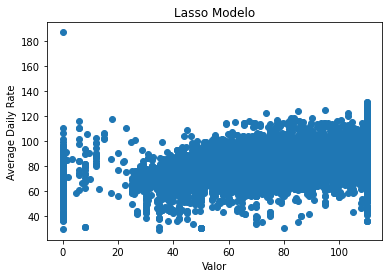

In [436]:
#Comparar en una gráfica de puntos el y_test (Valor real) vs preds_test (la predicción)
#Si las predicciones fueran perfectas, sería una línea completamente recta.

plt.scatter(y_test, preds_test)
plt.xlabel("Valor")
plt.ylabel("Average Daily Rate")
plt.title("Lasso Modelo")
plt.show()

In [437]:
#Importancia del valor lineal (qué tan importante es cada variable --> Solo funciona con Lasso)
importance = pd.Series(np.abs(linear_model.coef_.ravel()))
importance.index = selected_features #Eje X, el nombre de la variable
importance.sort_values(inplace=True, ascending=False) #Eje Y (valores por variable para el coef. de Lasso)

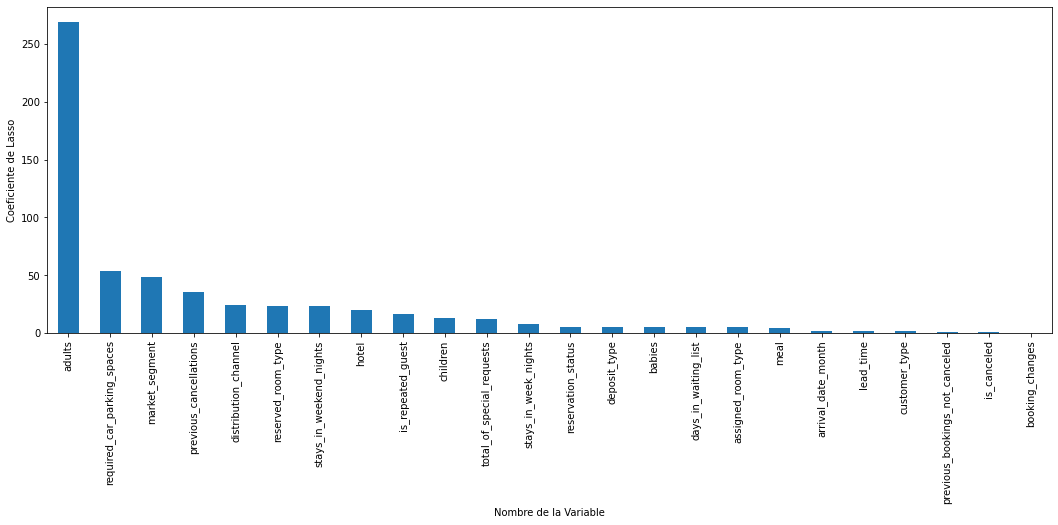

In [438]:
importance.plot.bar(figsize=(18, 6))
plt.ylabel("Coeficiente de Lasso")
plt.xlabel("Nombre de la Variable")
plt.show()

In [439]:
# Exportar el modelo como .joblib
import joblib

In [440]:
joblib.dump(linear_model, 'lasso_reg.joblib')

['lasso_reg.joblib']